# <centre> EDA Project on  "The Titanic Wreck" <centre/>


<img src="https://raw.githubusercontent.com/insaid2018/Tableau/master/Data/titanic11.jpg"/>

## Table of Contents

1. [Objective](#section1)<br>
2. [Importing Packages and Collecting Data](#section2)
3. [Data Profiling & Preprocessing](#section3)
    - 3.1 [Pre Profiling](#section301)<br/>
    - 3.2 [Preprocessing](#section302)<br/>
    - 3.3 [Post Profiling](#section303)<br/>
4. [Analysis Through Data Visualization](#section4)
    - 4.1 [What is Total Count of Survivals and Victims?](#section401)<br/>
    - 4.2 [Which Gender has more Survival rate?](#section402)<br/>
    - 4.3 [What is Survival rate based on Person type(Male,female,Child)](#section403)<br/>
    - 4.4 [Did Economy Class had an impact on Survival?](#section404)<br/>
    - 4.5 [What is the Survival probaility based on Embarkment of Passengers?](#section405)<br/>
    - 4.6 [How is Fare distributed for the Passengers?](#section406)<br/>
    - 4.7 [What was Average Fare by Pclass & Embark location?](#section407)<br/>
    - 4.8 [ Segment Age in bins with size of 20.Also Correlate Age with Survival.](#section408)<br/>
    - 4.9 [ Did Solo Traveller has less chances of Survival?](#section409)<br/>
    - 4.10 [How did Total family size affected Survival Count?](#section410)<br/>
    - 4.11 [How can you correlate Pclass/Age/fare with Survival rate?](#section411)<br/>
    - 4.12 [Which features had most Impact on Survival rate? ](#section412)<br/>
5. [Conclusions](#section5)<br/>  

# Objective



The objective here is to conduct Exploratory data analysis **(EDA)** on the Titanic Dataset in order to gather insights and evenutally predicting survior on basics of factors like Class ,Sex , Age , Gender ,Pclass etc.

**Why EDA?**
   - An approach to summarize, visualize, and become intimately familiar with the important characteristics of a data set.
   - Defines and Refines the selection of feature variables that will be used for machine learning.
   - Helps to find hidden Insights
   - It provides the context needed to develop an appropriate model with minimum errors


**About Event**

The RMS Titanic was a British passenger liner that **sank** in the **North Atlantic Ocean** in the early morning hours of **15 April 1912**, after it collided with an iceberg during its maiden voyage from **Southampton** to **New York City**. There were an estimated **2,224** passengers and crew aboard the ship, and more than **1,500** died, making it one of the deadliest commercial peacetime maritime disasters in modern history.
This sensational tragedy shocked the international community and led to better safety regulations for ships.




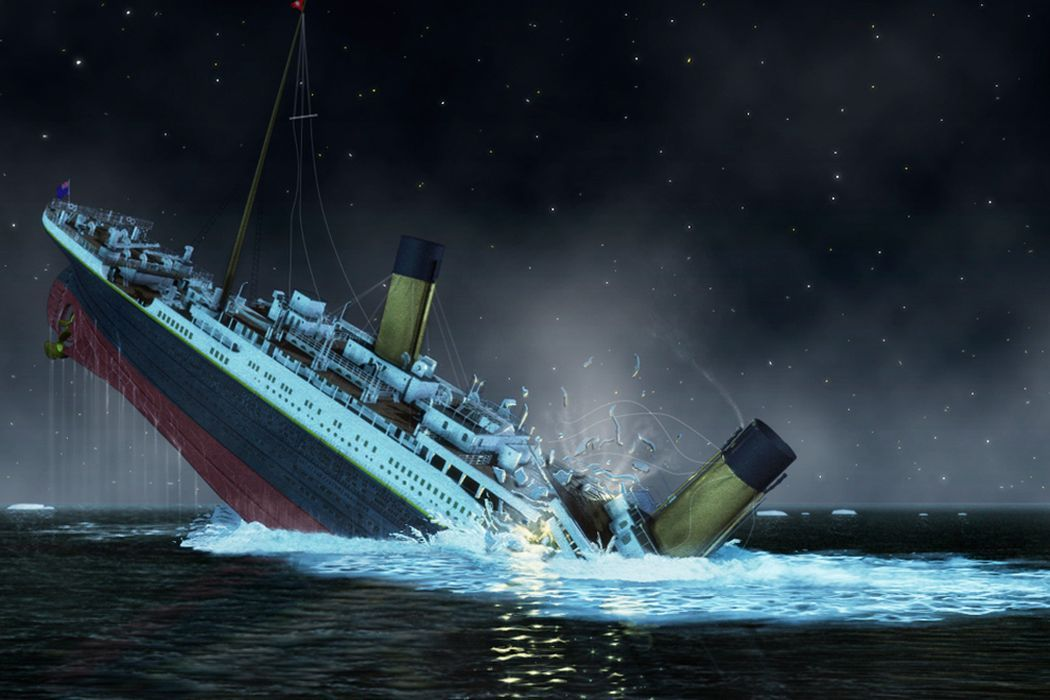

### 2. Data  Description

The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc.
The dataset comprises of 891 observations of 12 columns. Below is a table showing names of all the columns and their description.


| Column Name  | Description                                                                 |
|--------------|------------------------------------------------------------------------------|
| PassengerId  | Passenger Identity                                                           |
| Survived     | Survival (0 = No; 1 = Yes)                                                   |
| Pclass       | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)                                  |
| Name         | Name of passenger                                                            |
| Sex          | Sex of passenger                                                             |
| Age          | Age of passenger                                                             |
| SibSp        | Number of siblings and/or spouses travelling with passenger                  |
| Parch        | Number of parents and/or children travelling with passenger                  |
| Ticket       | Ticket number                                                                |
| Fare         | Price of ticket                                                              |
| Cabin        | Cabin number                                                                 |
| Embarkment   | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)         |


## Import necessary modules 

In [1]:
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
##import pandas_profiling # for installation: conda install -c conda-forge pandas-profiling
import seaborn as sns #Visualization
%matplotlib inline 
sns.set()
import warnings                                                                
warnings.filterwarnings('ignore') 
from matplotlib.pyplot import pie, axis, show #visualizations

**Importing Data**

In [2]:
Titanic_data=pd.read_csv(r"https://raw.githubusercontent.com/suyashi29/python-su/master/ML/titanic.csv")

In [3]:
Titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
Titanic_data.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# **Examining Data**

In [5]:
Titanic_data.shape #shows total number of rows and columns in data set

(891, 12)

In [6]:
Titanic_data.drop_duplicates(subset=None,keep="first",inplace=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
Titanic_data['PassengerId'] = Titanic_data['PassengerId'].astype(str)
Titanic_data['Pclass'] = Titanic_data['Pclass'].astype(str)

1. Relevant features to check survival probability:
2. Age, Fare, 
(Person_type(Infant,Adults,Young, Old))

## Statistical Summary about Data

In [9]:
Titanic_data.describe()#(include='all') ## Outcome for Numerical Values only 

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
Titanic_data.describe(include='object')  ## Outcome for Categorical Data 

,PassengerId,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,204,889
unique,891,3,891,2,681,147,3
top,1,3,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,491,1,577,7,4,644



**Insights**:

1.Total samples are **891** or **40%** of the actual number of passengers on board the Titanic **(2,224)**

2.Survived is a categorical feature with 0 or 1 values

3.Around **38%** samples survived representative of the actual survival rate at **32%**

4.Fares varied significantly with few passengers (<1%) paying as high as $512.

5.Few elderly passengers (<1%) within age range **65-80**.

6.More number of Male passengers

7.More travellers were Embarked form S


In [ ]:
x=np.array([1,2,3,4,5])
x.mean()
x.std()
x.var()
x.mean()

In [11]:
Titanic_data["Age"].mean()

29.69911764705882

# Data Preprocessing

1. Check for Errors and Null Values

2. Replace Null Values with appropriate values

3. Drop down features that are incomplete and are not too relevant for analysis

4. Create new features that can would help to improve prediction 

**Check for null or empty values in Data**

In [12]:
sum_null=Titanic_data.isnull().sum()
per_null= (Titanic_data.isnull().sum()/len(Titanic_data))*100
miss_data=pd.concat([sum_null,per_null],axis=1,keys=['Total','%'])
miss_data

,Total,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


The Age, Cabin and Embarked have null values.Lets fix them

**Filling missing age by median** ## Median is not affected by Outliers

In [13]:
new_age = Titanic_data.Age.median()  
Titanic_data.Age.fillna(new_age, inplace = True)
#Titanic_test.Age.fillna(new_age, inplace = True)

**Filling missing Embarked by mode**

In [14]:
Titanic_data.Embarked = Titanic_data.Embarked.fillna(Titanic_data['Embarked'].mode()[0])
#Titanic_test.Embarked = Titanic_test.Embarked.fillna(Titanic_data['Embarked'].mode()[0])

**Cabin feature may be dropped as it is highly incomplete or contains many null values**

In [15]:
Titanic_data.drop('Cabin', axis = 1,inplace = True)

**PassengerId  Feature may be dropped from training dataset as it does not contribute to survival**

In [ ]:
Titanic_data.drop('PassengerId', axis = 1,inplace = True)

**Ticket feature may be dropped down**

In [16]:
Titanic_data.drop('Ticket', axis = 1,inplace = True)

In [17]:
miss1=Titanic_data.isnull().sum()
miss= (Titanic_data.isnull().sum()/len(Titanic_data))*100
miss_data=pd.concat([miss1,miss],axis=1,keys=['Total','%'])
miss_data

,Total,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


In [18]:
Titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


# Feature Engineering:Creating New Fields

1. Create New Age Bands to improve  prediction Insights

2. Create a new feature called Family based on Parch and SibSp to get total count of family members on board

3. Create a Fare range feature if it helps our analysis

**AGE-BAND**

In [19]:
Titanic_data['Age_band']=0
Titanic_data.loc[Titanic_data['Age']<=1.5,'Age_band']="Infant"
Titanic_data.loc[(Titanic_data['Age']>1.5)&(Titanic_data['Age']<=13),'Age_band']="Children"
Titanic_data.loc[Titanic_data['Age']>13,'Age_band']="Adults"
Titanic_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S,Adults


**Fare-Band**

In [20]:
Titanic_data['FareBand']=0
Titanic_data.loc[(Titanic_data['Fare']>=0)&(Titanic_data['Fare']<=14),'FareBand']="L"
Titanic_data.loc[(Titanic_data['Fare']>14)&(Titanic_data['Fare']<=30),'FareBand']="M"
Titanic_data.loc[Titanic_data['Fare']>30,'FareBand']="H"
Titanic_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_band,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S,Adults,L


**Extracting Titles Now we can drop down Name feature**

In [21]:
Titanic_data.drop('Name', axis = 1,inplace = True)

- We can also create an artificial feature combining Pclass and Age.

In [22]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_band,FareBand
0,1,0,3,male,22.0,1,0,7.2500,S,Adults,L
1,2,1,1,female,38.0,1,0,71.2833,C,Adults,H
2,3,1,3,female,26.0,0,0,7.9250,S,Adults,L
3,4,1,1,female,35.0,1,0,53.1000,S,Adults,H
4,5,0,3,male,35.0,0,0,8.0500,S,Adults,L


# Data Visualization to describe and understand data

4.1 **What is Total Count of Survivals and Victims?**

In [23]:
Titanic_data.groupby(['Survived'])['Survived'].count()# similar functions unique(),sum(),mean() etc

Survived
0    549
1    342
Name: Survived, dtype: int64

##  Insight- 549 passengers died and 342 Passengers managed to survive

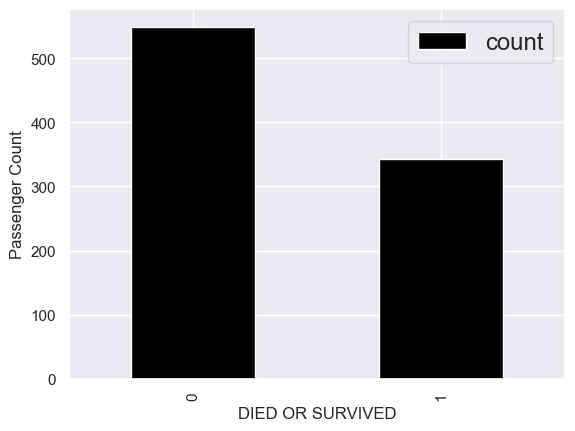

In [25]:
plt = Titanic_data.Survived.value_counts().plot(kind='bar',color="black")
plt.set_xlabel('DIED OR SURVIVED')
plt.set_ylabel('Passenger Count')
plt.legend(fontsize='x-large')

**Insights** 
- Only 342 Passengers Survived out of 891
- Majority Died which conveys there were less chances of Survival

--------------------------------------------------------------------------------------------------

4.2 **Which gender has more survival rate?**

In [26]:
#Titanic_data.groupby(['Survived', 'Sex']).count()["Age"]
Titanic_data.groupby(['Survived', 'Sex']).count()["Age"]

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Age, dtype: int64

<Axes: xlabel='Sex'>

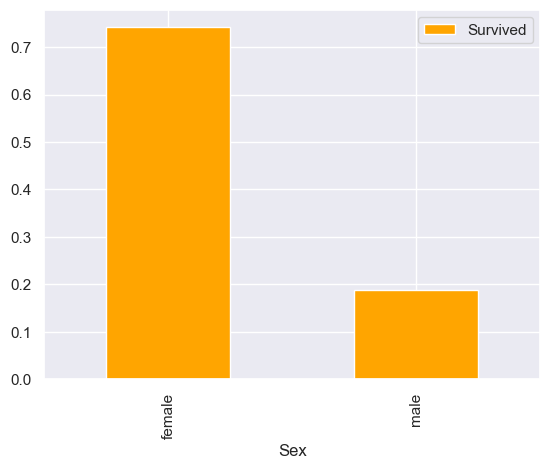

In [29]:
Titanic_data[['Sex','Survived']].groupby(['Sex']).mean().plot(kind='bar',color="Orange")

**Insights**

-  Female has better chances of Survival "LADIES FIRST"
-  There were more males as compared to females ,but most of them died.

4.3 **What is Survival rate based on Person type?**

In [30]:
Titanic_data.groupby(['Survived', 'Age_band']).count()['Sex']

Survived  Age_band
0         Adults      520
          Children     27
          Infant        2
1         Adults      300
          Children     30
          Infant       12
Name: Sex, dtype: int64

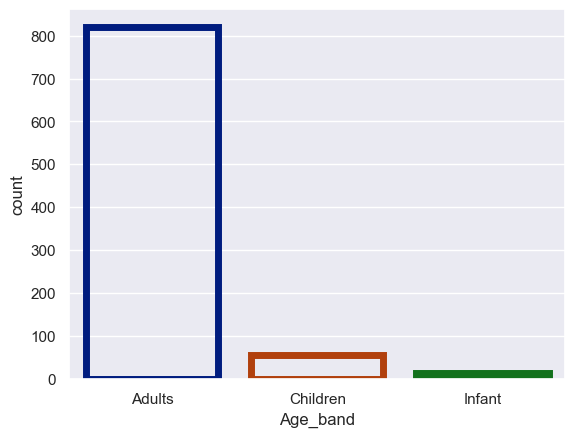

In [32]:
ax = sns.countplot(x="Age_band", data=Titanic_data,
                   facecolor=(0, 1, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

## More number of Adult travellers as compared to children and Infant

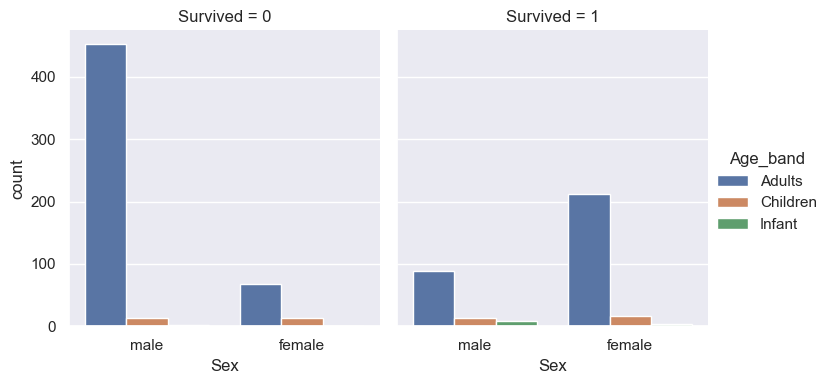

In [34]:
g = sns.catplot(x="Sex", hue="Age_band", col="Survived",
                data=Titanic_data, kind="count",
                height=4, aspect=.92);

(-0.325, 1.325, 0.0, 576.45)

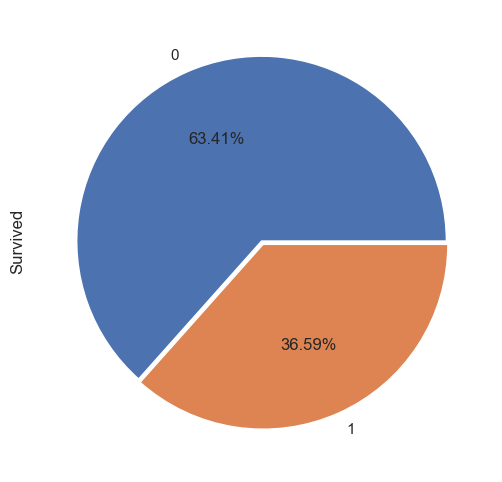

In [35]:
Titanic_data[Titanic_data['Age_band'] == 'Adults'].Survived.groupby(Titanic_data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.02],autopct='%1.2f%%')
plt.axis('equal')
#plt.legend(["Died","Survived"])
#plt.set_title("Adult survival rate")
#plt.show()





(-0.325, 1.325, 0.0, 576.45)

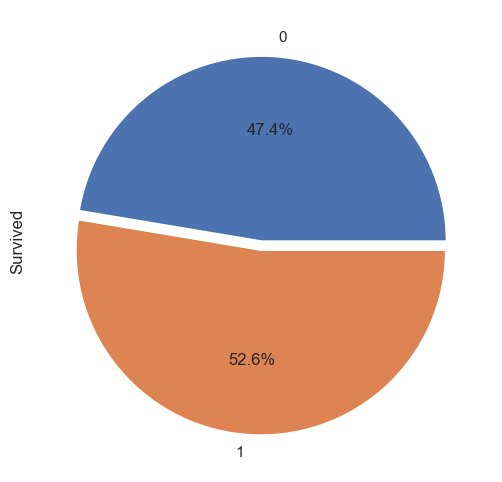

In [36]:
Titanic_data[Titanic_data['Age_band'] == 'Children'].Survived.groupby(Titanic_data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
#plt.legend(["Died","Survived"])
#plt.set_title("Child survival rate")
#plt.show()

------------------------------------------**CHILD-SURVIVAL RATE**--------------------------------------------------------------

(-0.325, 1.325, 0.0, 576.45)

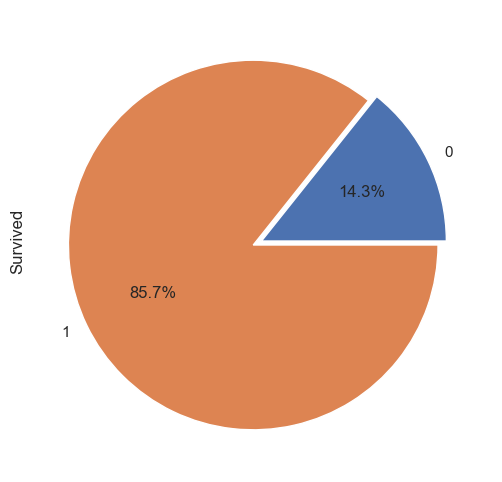

In [37]:
Titanic_data[Titanic_data['Age_band'] == 'Infant'].Survived.groupby(Titanic_data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
#plt.legend(["Died","Survived"])
#plt.set_title("Infant survival rate")
#plt.show()

**Insights** 

- Majority Passengers  were  Adults

- Almost half of the total number of children survived.

- Most of the Adults failed to Survive

- More than 85percent of Infant Survived


4.4 **Did Economy Class had an impact on survival rate?**

In [38]:
Titanic_data.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

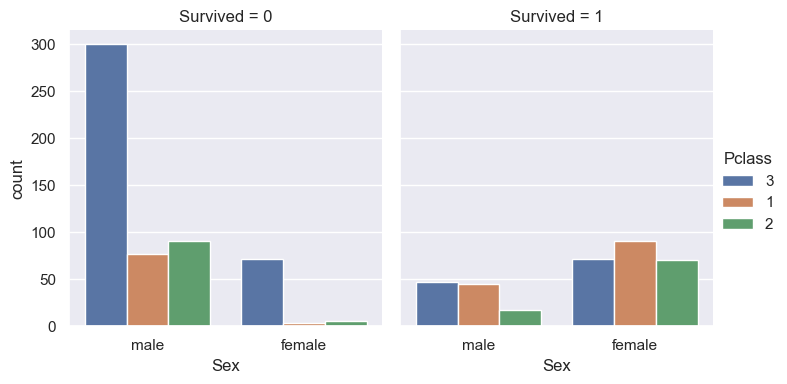

In [41]:
g = sns.catplot(x="Sex", hue="Pclass", col="Survived",
                data=Titanic_data, kind="count",
                height=4, aspect=.92);

**Insights**

- Most of the passengers travelled in Third class but only 24per of them survived

- If we talk about survival ,more passengers in First class survived and again female given more priority

- Economic Class affected Survival rate and Passengers travelling with First Class had higher ratio of survival as compared to Class 2 and 3.

4.5 **What is Survival Propability based on Embarkment of passengers?**

Titanic’s first voyage was to New York before sailing to the Atlantic Ocean it picked passengers from three ports Cherbourg(C), Queenstown(Q), Southampton(S). Most of the Passengers in Titanicic embarked from the port of Southampton.Lets see how embarkemt affected survival probability.

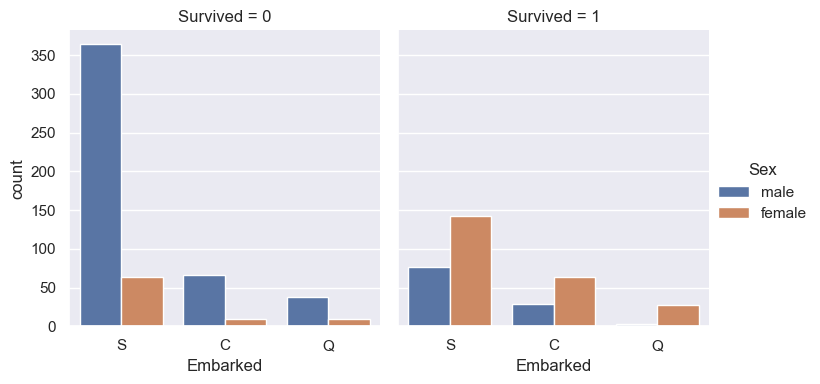

In [44]:
g = sns.catplot(x="Embarked", hue="Sex", col="Survived",
                data=Titanic_data, kind="count",
                height=4, aspect=.92);



4.6 **How is Fare distributed for  Passesngers?**

In [45]:
Titanic_data['Fare'].min()

0.0

In [46]:
Titanic_data['Fare'].max()

512.3292

In [ ]:
Titanic_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [ ]:
Titanic_data.groupby(['FareBand', 'Survived'])['Survived'].count()

In [ ]:
sns.swarmplot(x='Survived', y='Fare', data=Titanic_data,color="green") 

**Insights**

- Majority Passenger's fare lies in 0-100 dollars range
- Passengers who paid more Fares had more chances of Survival
- Fare as high as 514 dollars was purcharsed by very few.(Outlier)

4.7 **What was Average fare by Pclass & Embark location?**

In [ ]:
sns.boxplot(x="Pclass", y="Fare", data=Titanic_data)

**Insights**

- First Class Passengers paid major part of total Fare.
- Passengers who Embarked from Port C paid Highest Fare

4.8 **Segment Age in bins with size of 10**

In [ ]:
plt=Titanic_data['Age'].hist(bins=10)
plt.set_ylabel('Passengers')
plt.set_xlabel('Age of Passengers')
plt.set_title('Age Distribution of Titanic Passengers',size=10, y=.5)

Insights:
- The youngest passenger on the Titanic were toddlers under 6 months
- The oldest were of 80 years of age. 
- The mean for passengers was a bit over 29 years i.e there were more young passengers in the ship.

**Lets see how Age has correlation with Survival**

In [ ]:

sns.distplot(Titanic_data[Titanic_data['Survived']==1]['Age'])

In [ ]:
sns.distplot(Titanic_data[Titanic_data['Survived']==0]['Age'])

In [ ]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=Titanic_data,split=True)

**Insights**
- Most of the passengers died.
- Majority of passengers were between 25-40,most of them died
- Female are more likely to survival 

4.9 **Did Solo Passenger has less chances of Survival ?**

In [ ]:
Titanic_data 

In [ ]:
Titanic_data['FamilySize']=0
Titanic_data['FamilySize']=1+Titanic_data['Parch']+Titanic_data['SibSp']
Titanic_data['SoloPassenger']=0
Titanic_data.loc[Titanic_data.FamilySize==1,'SoloPassenger']=1

In [ ]:
Titanic_data.head()

In [ ]:
sns.factorplot('SoloPassenger','Survived',data=Titanic_data)

In [ ]:
sns.factorplot('SoloPassenger','Survived',hue='Pclass',col="Embarked",data=Titanic_data)

**Insights**

- Most of the Passengers were travelling Solo and most of them died
- Solo Females were more likely to Survive as compared to males
- Passengers Class have a positive correlation with Solo Passenger Survival
- Passengers Embarked from Port Q had Fifty -Fifty  Chances of Survival 


4.10 **How did total family size affected Survival Count**?

In [ ]:
sns.violinplot('SoloPassenger','Survived',hue='Pclass',data=Titanic_data)

In [ ]:
for i in Titanic_data:
    Titanic_data['FamilySize'] = Titanic_data['SibSp'] + Titanic_data['Parch'] + 1

Titanic_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
sns.barplot(x='FamilySize', y='Survived', data=Titanic_data,ci= None )

**Insights**
- Both men and women had a massive drop of survival with a FamilySize over 4. 
- The chance to survive as a man increased with FamilySize until a size of 4
- Men are not likely to Survive with FamilySize 5 and 6
- Big Size Family less likihood of Survival

4.11 **How can you correlate Pclass/Age/Fare with Survival rate?**

In [ ]:
sns.pairplot(Titanic_data[["Fare","Age","Pclass","Survived"]],vars= ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["*", "."])
#plt.set_title('Pair Plot')

Insights:

- Fare and Survival has positive correlation

- We cannt relate age and Survival as majority of travellers were of mid age

- Higher Class Passengers had more likeihood of Survival


4.12 **Which features had most impact on Survival rate?**

In [ ]:
sns.heatmap(Titanic_data.corr().round(2),annot=True)
#p = Titanic_data.corr("Sex")
#print (p)

**Insights**:

- Older women have higher rate of survival than older men . Also, older women has higher rate of survival than younger women; an opposite trend to the one for the male passengers.
- All the features are not necessary to predict Survival
- More Features creates Complexitity 
- Fare has positive Correlation
- For Females major Survival Chances , only for port C males had more likeihood of Survival.


# Conclusion : "If you were young female travelling in First Class and embarked from port -C then you had best chances of Survival in Titanic"

-  Most of the Passengers Died
- "Ladies & Children First" i.e **76% of Females and 16% of Children** Survived
-  Gender , Passenger type & Classs are mostly realted to Survival.
-  Survival rate diminishes significantly for Solo  Passengers
-  Majority of Male Died
-  Males with Family had better Survival rate as compared to Solo Males

******************************************************************************************************************************